<a href="https://colab.research.google.com/github/ketanp23/scsd-ddm-class/blob/main/TimeSeries_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Line Plots

A line plot is a graphical display that visually represents the correlation between certain variables or changes in data over time using several points, usually ordered in their x-axis value, that are connected by straight line segments. The independent variable is represented in the x-axis while the y-axis represents the data that is changing depending on the x-axis variable, aka the dependent variable.

In [ ]:
import pandas as pd

# Create a list of data to be represented in x-axis
days = [ 'Saturday' , 'Sunday' , 'Monday' , 'Tuesday' ,
        'Wednesday' , 'Thursday' , 'Friday' ]

# Create a list of data to be
# represented in y-axis
calories = [ 1670 , 2011 , 1853 , 2557 ,
            1390 , 2118 , 2063 ]

# Create a dataframe using the two lists
df_days_calories = pd.DataFrame(
    { 'day' : days , 'calories' : calories })

df_days_calories

,day,calories
0,Saturday,1670
1,Sunday,2011
2,Monday,1853
3,Tuesday,2557
4,Wednesday,1390
5,Thursday,2118
6,Friday,2063


<Axes: xlabel='day'>

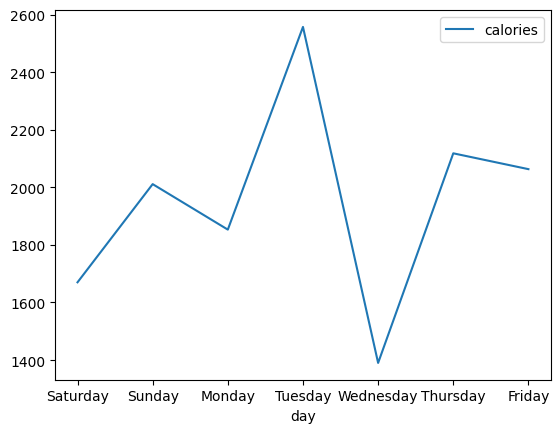

In [ ]:
# use plot() method on the dataframe
df_days_calories.plot( 'day' , 'calories' )

**Seasonality**

Seasonality in time series is recurring and regular patterns at a set interval, which is caused by weather, holidays or business cycles. Ice cream sales usually reach their peak during summer and decrease during winter. Seasonality can happen at any time interval, for instance, daily, weekly or yearly, and can have patterns such as increased weekend sales. Determining these regular patterns is necessary for precise time series forecasting

**Why to Detect Seasonality in Time Series Data?**

*There are certain specific reasons that are discussed below:*

**Pattern Detection:** Identifying seasonality aids analysts in detecting repeating patterns, enhancing data interpretation and future prediction.

**Forecasting:** Proper identification of seasonal trends assists in the development of stable forecasting models, resulting in better predictions.

**Anomaly Detection:** Understanding the seasonal behavior of data allows us to spot anomalies that deviate from expected seasonal trends, signaling important events.

**Optimized Decision-Making:** Recognizing seasonality allows organizations to optimize resources, adjust inventory and fine-tune strategies based on seasonal demands.


Handling Seasonality in Time Series Data
The easiest way to deal with seasonality is through seasonal differencing. Seasonal differencing eliminates the seasonal effect, thus converting the time series into stationary form, which is mostly necessary for forecasting accurately.

Seasonal differencing is achieved by taking away the data point from the same data point in the previous season. For instance, if you're dealing with monthly data and the seasonality recurs every 12 months, you would take away the current month's data from the data 12 months prior.

This process helps eliminate the cyclical patterns, making the data more suitable for model training. In Python, seasonal differencing can be easily applied using the .diff() method in Pandas, specifying a period (e.g., 12 for monthly data with yearly seasonality).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

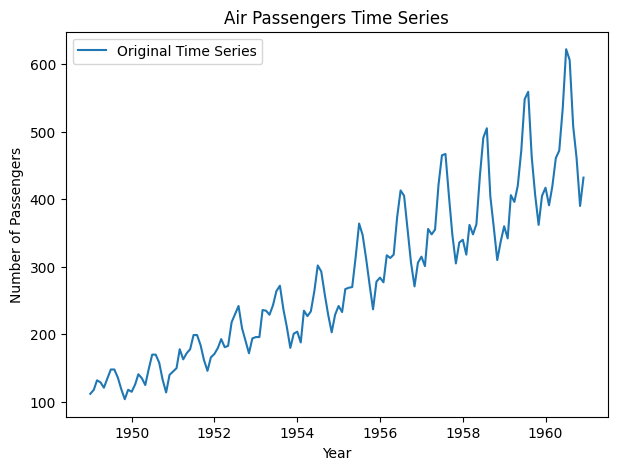

In [ ]:
data = pd.read_csv('AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data.set_index('Month', inplace=True)

# Plot the original time series data
plt.figure(figsize=(7, 5))
plt.plot(data, label='Original Time Series')
plt.title('Air Passengers Time Series')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

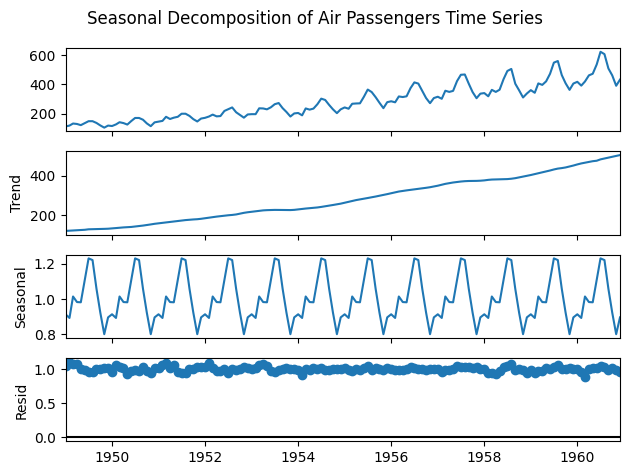

In [ ]:
# Decompose the time series into trend, seasonal and residual components
result = seasonal_decompose(
    data, model='multiplicative', extrapolate_trend='freq')
result.plot()
plt.suptitle('Seasonal Decomposition of Air Passengers Time Series')
plt.tight_layout()
plt.show()

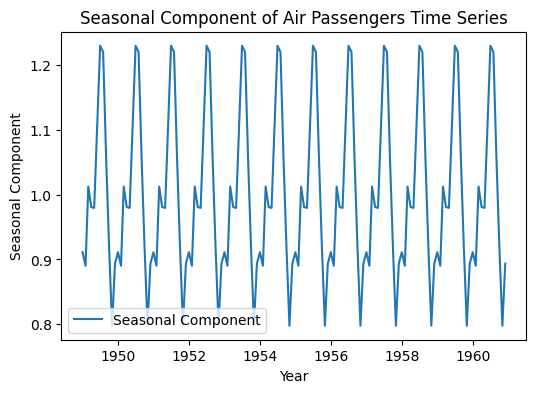

In [ ]:
# Plot the seasonal component
plt.figure(figsize=(6, 4))
plt.plot(result.seasonal, label='Seasonal Component')
plt.title('Seasonal Component of Air Passengers Time Series')
plt.xlabel('Year')
plt.ylabel('Seasonal Component')
plt.legend()
plt.show()

Removing seasonality from the data
To use a time-series data for various purposes including model training it is required to have a seasonality free time-series data.

Equation:

d(t) = y(t) - y(t - m)

Where:

d (t) is the differenced data point at time t.
y (t) is the value of the series at time t.
y (t - m) is the value of the data point at the previous season.
m is the length of one season (in this case, m = 12 as we have yearly seasonality).
This equation represents seasonal differencing, used to remove the seasonal component from the data.

Here we will visualize how organized it will look after removing the seasonality.

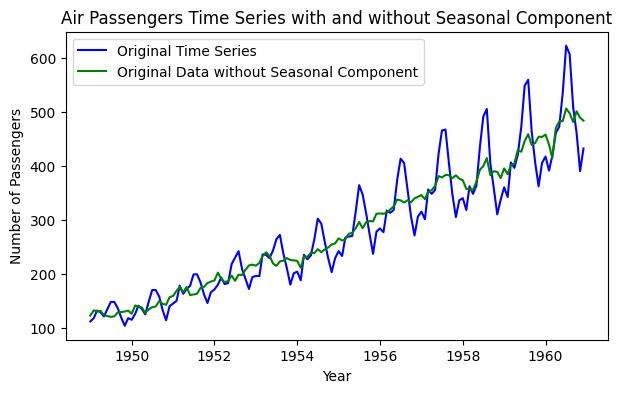

In [ ]:
# Plotting the original data and original data without the seasonal component
plt.figure(figsize=(7, 4))

# Plot the original time series data
plt.plot(data, label='Original Time Series', color='blue')
data_without_seasonal = data['#Passengers'] / result.seasonal

# Plot the original data without the seasonal component
plt.plot(data_without_seasonal,
         label='Original Data without Seasonal Component', color='green')
plt.title('Air Passengers Time Series with and without Seasonal Component')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

Once we have eliminated the seasonality from our data, we have to test if the data series has turned stationary. One such method of testing stationarity is by applying the Augmented Dickey-Fuller (ADF) test. The ADF test is used to ascertain if a time series is stationary by conducting a test for the null hypothesis that the series contains a unit root (or is non-stationary).

Here’s how we can perform the ADF test:

In [ ]:
from statsmodels.tsa.stattools import adfuller

#Perform the ADF test on the de - seasonalized data
adf_result = adfuller(data_without_seasonal)

#Extract and display the test statistics and p - value
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

#Interpreting the results
if adf_result[1] < 0.05 : print("The data is stationary (p-value < 0.05).")
else : print("The data is not stationary (p-value >= 0.05).")

ADF Statistic: 1.1415289777074211
p-value: 0.9955559262862962
The data is not stationary (p-value >= 0.05).


This step is crucial for ensuring that the time-series data is ready for further analysis or forecasting model training.



Decomposition Plots

Statsmodels Time Series Analysis (tsa) Module
The Statsmodels library is used for estimating and interpreting various statistical models in Python.
The tsa module within Statsmodels focuses on time series analysis and provides tools for decomposing time series, fitting models, and conducting statistical tests for time series data.
It is widely used for time series forecasting, econometrics, and statistical analysis of temporal data.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

The following generates a synthetic time series dataset (ts) with daily data points that combine a sine wave pattern and random noise, simulating a time series with some underlying periodic behavior and variability. The time series spans one year, from "2021-01-01" to the end of the year. The random seed is set to ensure reproducibility.



In [14]:
np.random.seed(0)
date_rng = pd.date_range(start="2021-01-01", periods=365, freq="D")
data = np.sin(np.arange(365) * 2 * np.pi / 365) + np.random.normal(0, 0.5, 365)
ts = pd.Series(data, index=date_rng)
ts
ts

,0
2021-01-01,0.882026
2021-01-02,0.217292
2021-01-03,0.523791
2021-01-04,1.172066
2021-01-05,1.002581
...,...
2021-12-27,0.263264
2021-12-28,-0.066917
2021-12-29,0.414305
2021-12-30,0.135561


The following code creates a line plot of the original time series (ts) and sets up the plot with specific dimensions. It also adds a legend to the plot to label the time series data, making it more informative and easier to understand when interpreting the visualization. The resulting plot will display the time series data over time, with dates on the x-axis and the values on the y-axis.

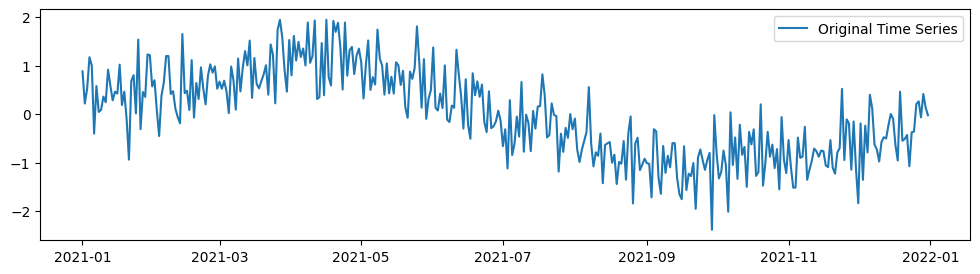

In [15]:
plt.figure(figsize=(12, 3))
plt.plot(ts, label='Original Time Series')
plt.legend()

The code performs an additive decomposition of the original time series and stores the result in the result_add variable, allowing you to further analyze and visualize the decomposed components.



In additive decomposition, the time series is expressed as the sum of its components:
Y(t)=Trend(t)+Seasonal(t)+Residual(t)

It's suitable when the magnitude of seasonality doesn't vary with the magnitude of the time series.

In [16]:
result_add = seasonal_decompose(ts, model='additive')

The following code creates a line plot of the trend component obtained from the additive decomposition of the time series and sets up the plot with specific dimensions. It also adds a legend to the plot to label the trend component, making it more informative and easier to understand when interpreting the visualization. The resulting plot will display the trend component of the time series over time.

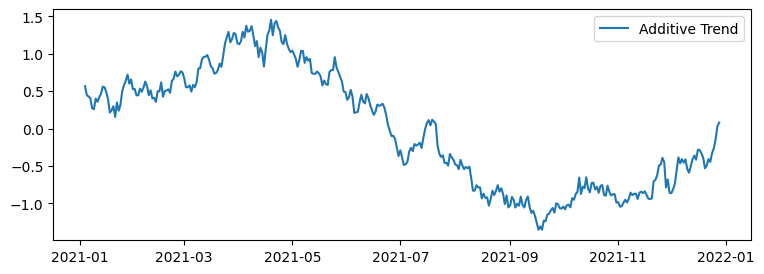

In [17]:
plt.figure(figsize=(9, 3))

plt.plot(result_add.trend, label='Additive Trend')
plt.legend()

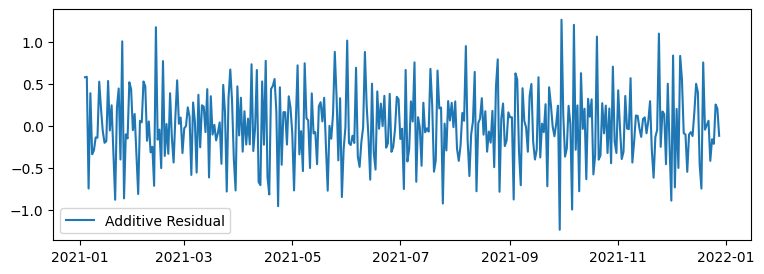

In [24]:
plt.figure(figsize=(9, 3))

plt.plot(result_add.resid, label='Additive Residual')
plt.legend()

The following code creates a line plot of the seasonal component obtained from the additive decomposition of the time series and sets up the plot with specific dimensions. It also adds a legend to the plot to label the seasonal component, making it more informative and easier to understand when interpreting the visualization. The resulting plot will display the seasonal component of the time series over time.






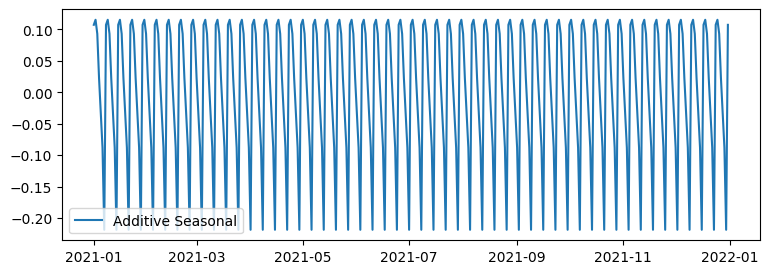

In [18]:
plt.figure(figsize=(9, 3))

plt.plot(result_add.seasonal, label='Additive Seasonal')
plt.legend()

Methods of Decomposition
Moving Averages:

Moving averages involve calculating the average of a certain number of past data points.
It helps smooth out fluctuations and highlight trends.


The provided code calculates a simple moving average (SMA) for the original time series ts with a 7-day moving window






In [19]:
ema_window = 30  # 30-day moving average
ema = ts.ewm(span=ema_window, adjust=False).mean()
ema

,0
2021-01-01,0.882026
2021-01-02,0.839140
2021-01-03,0.818795
2021-01-04,0.841587
2021-01-05,0.851973
...,...
2021-12-27,-0.428505
2021-12-28,-0.405176
2021-12-29,-0.352307
2021-12-30,-0.320831


The provided code is responsible for creating a plot that overlays the original time series (ts) with both the 7-day simple moving average (SMA) and the 30-day exponential moving average (EMA).components:

The provided code calculates a simple moving average (SMA) for the original time series ts with a 7-day moving window

In [20]:
sma_window = 7  # 7-day moving average
sma = ts.rolling(window=sma_window).mean()
sma

,0
2021-01-01,NaN
2021-01-02,NaN
2021-01-03,NaN
2021-01-04,NaN
2021-01-05,NaN
...,...
2021-12-27,-0.326866
2021-12-28,-0.262944
2021-12-29,-0.142060
2021-12-30,0.030998


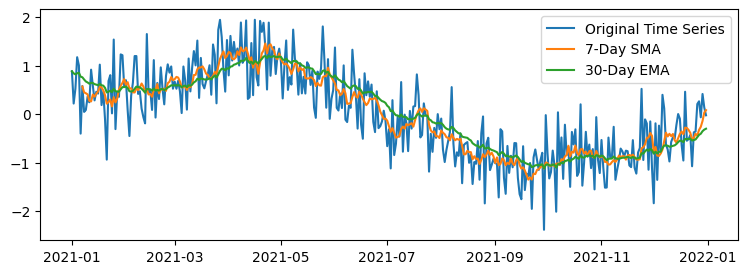

In [21]:
plt.figure(figsize=(9, 3))
plt.plot(ts, label='Original Time Series')
plt.plot(sma, label=f'{sma_window}-Day SMA')
plt.plot(ema, label=f'{ema_window}-Day EMA')
plt.legend()

Multiplicative Decomposition:

In multiplicative decomposition, the time series is expressed as the product of its components:

Y(t)=Trend(t)∗Seasonal(t)∗Residual(t)

It's suitable when the magnitude of seasonality scales with the magnitude of the time series.



Time series decomposition is a crucial step in understanding and analyzing time series data. By breaking down a time series into its trend, seasonality, and residual components, we can gain valuable insights for forecasting, anomaly detection, and decision-making. Depending on the nature of your data, you can choose between additive and multiplicative decomposition methods. Additionally, moving averages can be a useful tool for smoothing out data and simplifying complex patterns. These techniques are essential for anyone working with time series data, from financial analysts to data scientists, and can lead to more accurate predictions and better-informed decisions.